In [29]:
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

In [30]:
expr_res_data_path = '20230722_19_37_55_headup_detect_delay_test_new_0.3_0.7_tx2-cloud-raw.csv'

df = pd.read_csv(expr_res_data_path)
df = df[1:]
max_fps = 30
df.loc[df['fps'] >= 30, 'fps'] = max_fps
resolution_map = {"360p": 0, "480p": 1, "720p": 2, "1080p": 3}
df['resolution'] = df['resolution'].replace(resolution_map)

df

,n_loop,frame_id,total,up,fps,resolution,delay,face_detection,face_alignment
1,2,2.0,22,20,30,1,0.620294,host,host
2,3,3.0,24,23,30,1,0.672431,host,cloud
3,4,4.0,25,20,30,1,0.336589,host,cloud
4,5,5.0,23,21,30,1,0.282287,host,cloud
5,6,6.0,22,20,30,1,0.332202,host,cloud
...,...,...,...,...,...,...,...,...,...
310,311,605.0,29,29,20,1,0.328821,cloud,cloud
311,312,607.0,29,29,20,1,0.243662,cloud,cloud
312,313,608.0,30,28,10,1,0.367130,cloud,cloud
313,314,609.0,31,27,10,1,0.363206,cloud,cloud


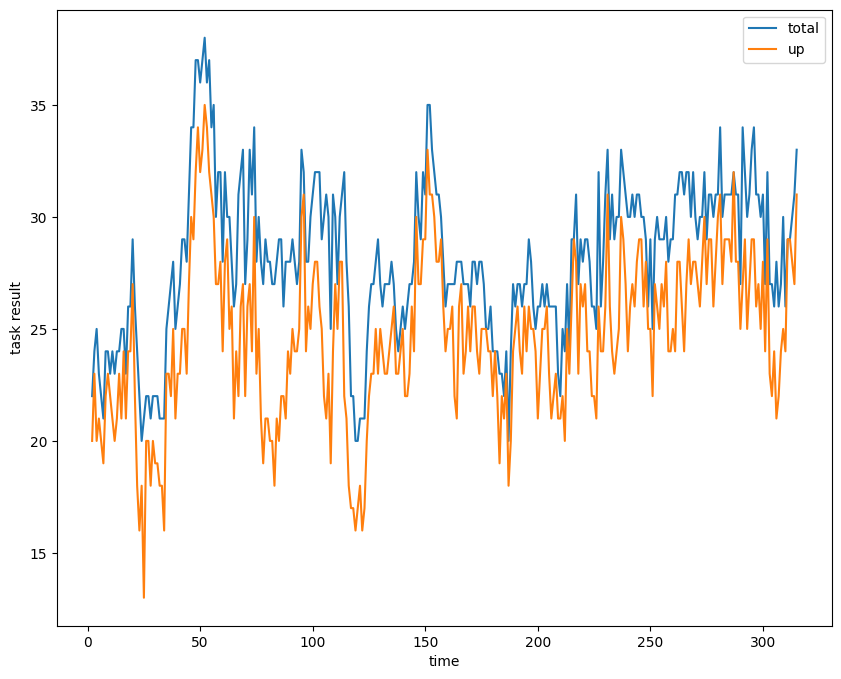

In [31]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
ax.plot(df['n_loop'], df['total'], label='total')
ax.plot(df['n_loop'], df['up'], label='up')
# ax.title.set_text('total/up vs time')
plt.xlabel('time')
plt.ylabel('task result')
ax.legend()

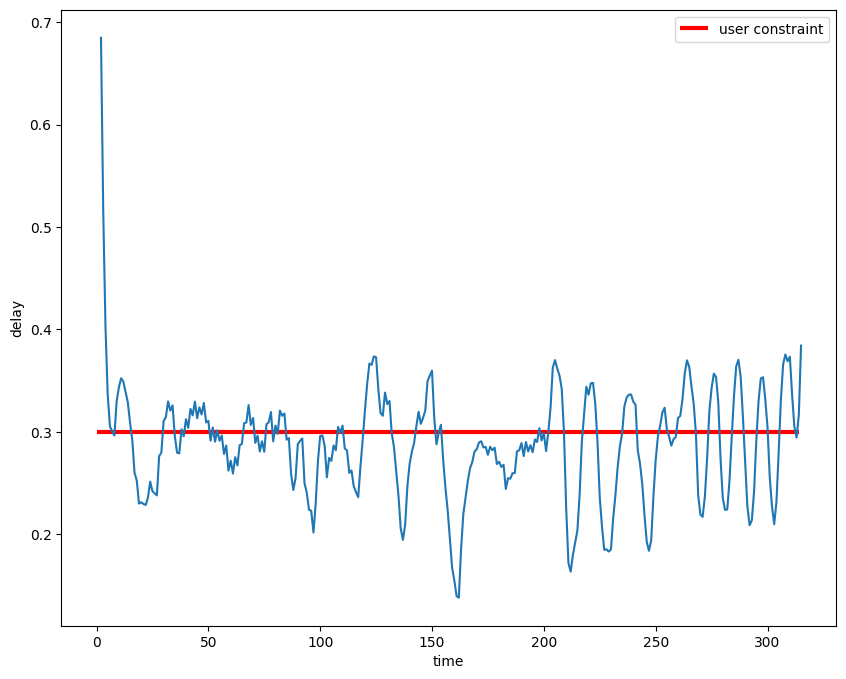

In [32]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
ax.hlines(y=0.3, xmin=0, xmax=len(df['n_loop']), linewidth=3, color='r', label='user constraint')
ax.plot(df['n_loop'], scipy.signal.savgol_filter(df['delay'], 11, 3))
# ax.plot(df['n_loop'], df['delay'])
# ax.title.set_text('delay vs time')
plt.xlabel('time')
plt.ylabel('delay')
ax.legend()

Text(0, 0.5, 'frame rate')

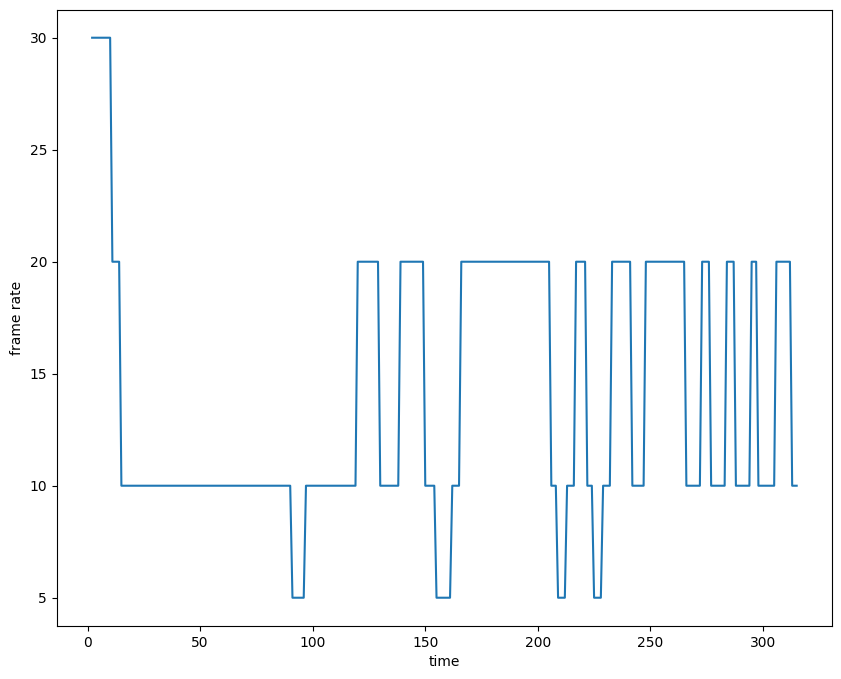

In [33]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
ax.plot(df['n_loop'], df['fps'])
# ax.title.set_text('frame rate vs time')
plt.xlabel('time')
plt.ylabel('frame rate')

Text(0, 0.5, 'time')

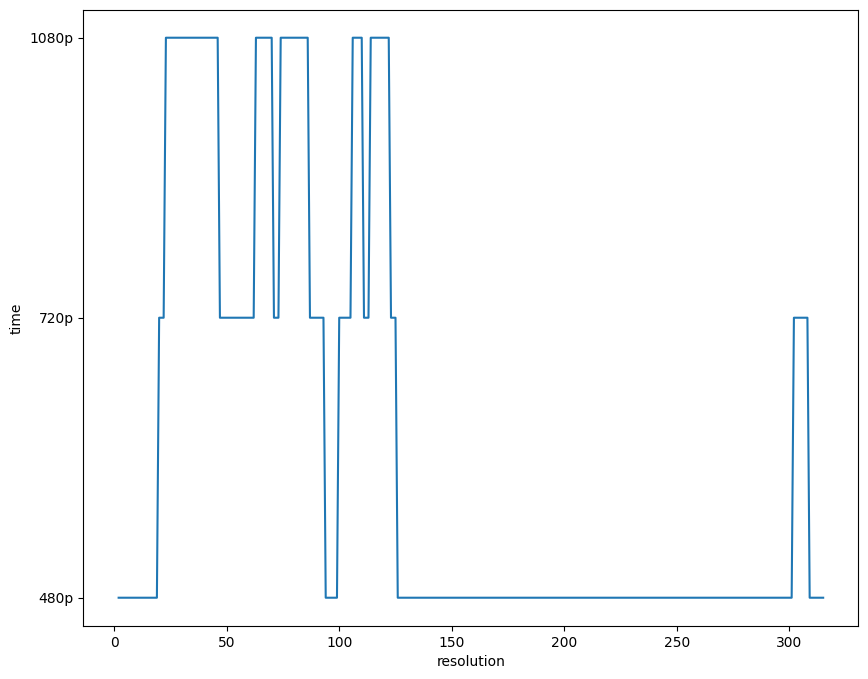

In [34]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
ax.set_yticks(np.arange(4))
ax.set_yticklabels(resolution_map.keys())
ax.plot(df['n_loop'], df['resolution'])
# ax.title.set_text('resolution vs time')
plt.xlabel('resolution')
plt.ylabel('time')

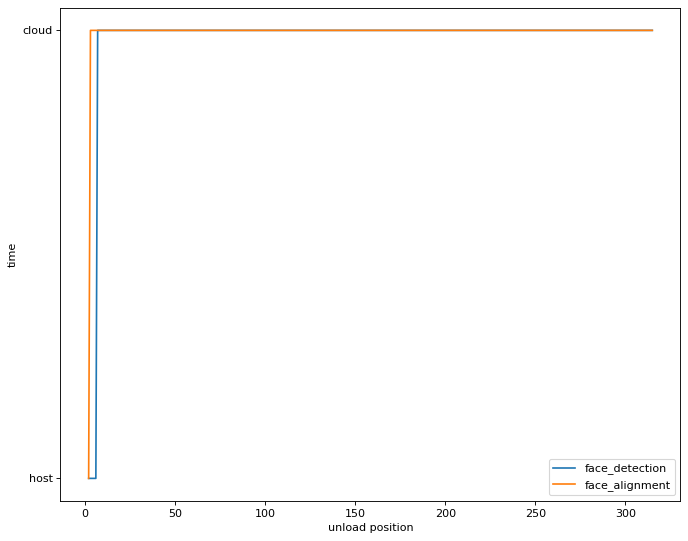

In [35]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=80)
ax.plot(df['n_loop'], df['face_detection'], label='face_detection')
ax.plot(df['n_loop'], df['face_alignment'], label='face_alignment')
# ax.title.set_text('unload position vs time')
plt.xlabel('unload position')
plt.ylabel('time')
ax.legend()